# ML Challenge 

<img src="https://imageio.forbes.com/specials-images/imageserve/5ecd179f798e4c00060d2c7c/0x0.jpg?format=jpg&height=600&width=1200&fit=bounds" width="500" height="300">

In the bustling city of Financia, the Central Lending Institution (CLI) is the largest provider of loans to individuals and businesses. With a mission to support economic growth and financial stability, CLI processes thousands of loan applications every month. However, the traditional manual review process is time-consuming and prone to human error, leading to delays and inconsistencies in loan approvals.
To address these challenges, CLI has decided to leverage the power of machine learning to streamline their loan approval process. They have compiled a comprehensive dataset containing historical loan application records, including various factors such as credit scores, income levels, employment status, loan terms(measured in years), loan amounts, asset values, and the final loan status (approved or denied).


**Your task is to develop a predictive model that can accurately determine the likelihood of loan approval based on the provided features. By doing so, you will help CLI make faster, more accurate, and fairer lending decisions, ultimately contributing to the financial well-being of the community.**

It is recommended that you follow the typical machine learning workflow, though you are not required to strictly follow each steps: 
1. Data Collection: Gather the data you need for your model. (Already done for you)

2. Data Preprocessing: Clean and prepare the data for analysis. (Already done for you)

3. Exploratory Data Analysis (EDA): Understand the data and its patterns. (Partially done for you)

4. Feature Engineering: Create new features or modify existing ones to improve model performance. (Partially done for you)

5. Model Selection: Choose the appropriate machine learning algorithm.

6. Model Training: Train the model using the training dataset.

7. Model Evaluation: Evaluate the model's performance using a validation dataset.

8. Model Optimization: Optimize the model's parameters to improve performance.

9. Model Testing: Test the final model on a separate test dataset.

**Please include ALL your work and thought process in this notebook**

In [2]:
# You may include any package you deem fit. We sugggest looking into Scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset


In [4]:
# DO NOT MODIFY
loan_data = pd.read_csv("../../data/loan_approval.csv")
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## EDA
Uncomment to see desired output. Add more analysis if you like

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')
           loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    

ValueError: could not convert string to float: 'Graduate'

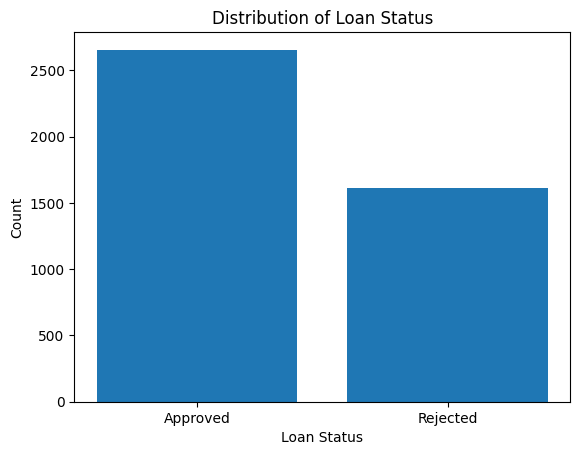

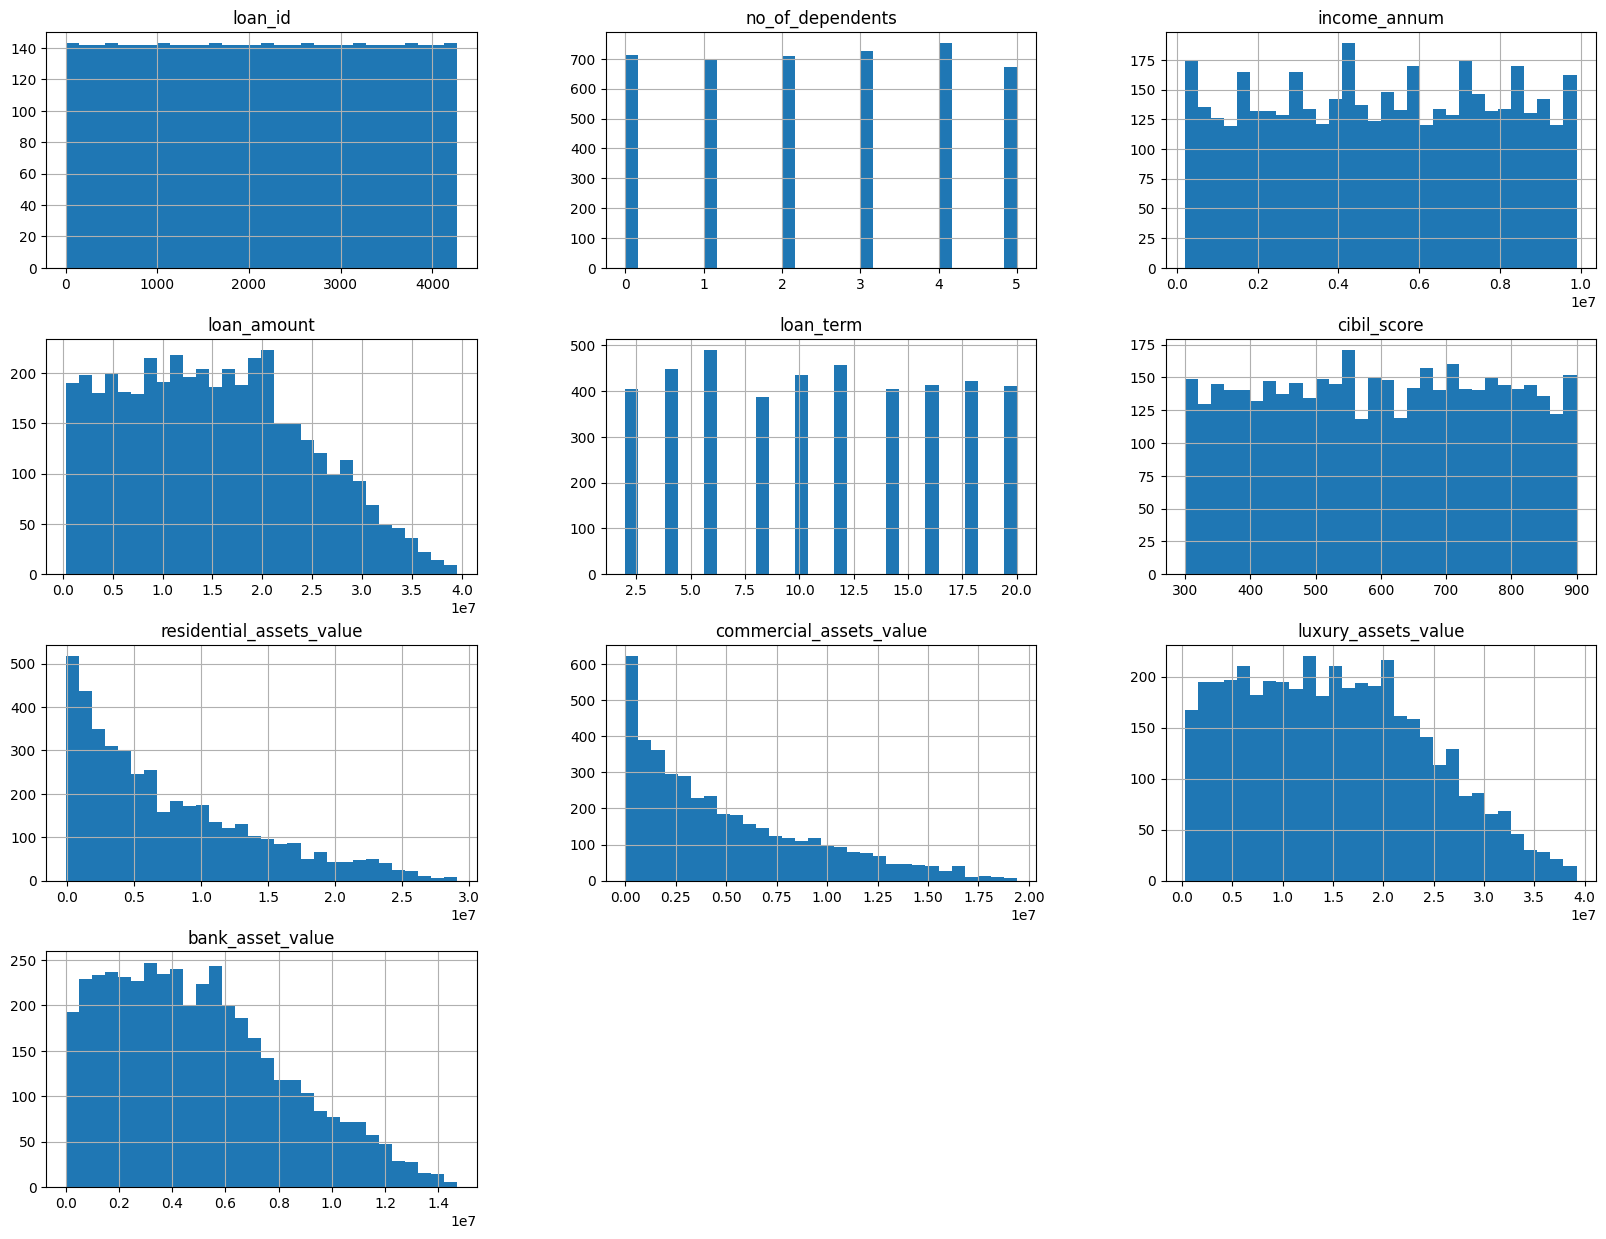

In [9]:

import matplotlib.pyplot as plt

# ------ Display basic information ------
print(loan_data.columns)
print(loan_data.describe())

# ------ Check for missing values ------
print(loan_data.isnull().sum())

# ------ Visualize the distribution of loan status ------
loan_status_counts = loan_data['loan_status'].value_counts()
plt.bar(loan_status_counts.index, loan_status_counts.values)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# ------ Visualize the distribution of numerical features ------ 
loan_data.hist(bins=30, figsize=(20, 15))

# ------ Correlation matrix ------
# corr_matrix = loan_data.corr()
# fig, ax = plt.subplots(figsize=(10, 8))
# cax = ax.matshow(corr_matrix, cmap='coolwarm')
# fig.colorbar(cax)
# plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
# plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# ----- MORE (Encouraged but not required) ------


In [7]:
print(loan_data.shape)

(4269, 13)


In [11]:
loan_data.info()
#no nulls! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [17]:
print(loan_data["self_employed"].value_counts())
print(loan_data["loan_status"].value_counts())

self_employed
Yes    2150
No     2119
Name: count, dtype: int64
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


In [18]:
#convert categorical variables to numerical to plot correlation
loan_data['education'] = loan_data['education'].map({'Graduate': 1, 'Not Graduate': 0})
loan_data['self_employed'] = loan_data['self_employed'].map({'Yes': 1, 'No': 0})
loan_data['loan_status'] = loan_data['loan_status'].map({'Approved': 1, 'Rejected': 0})

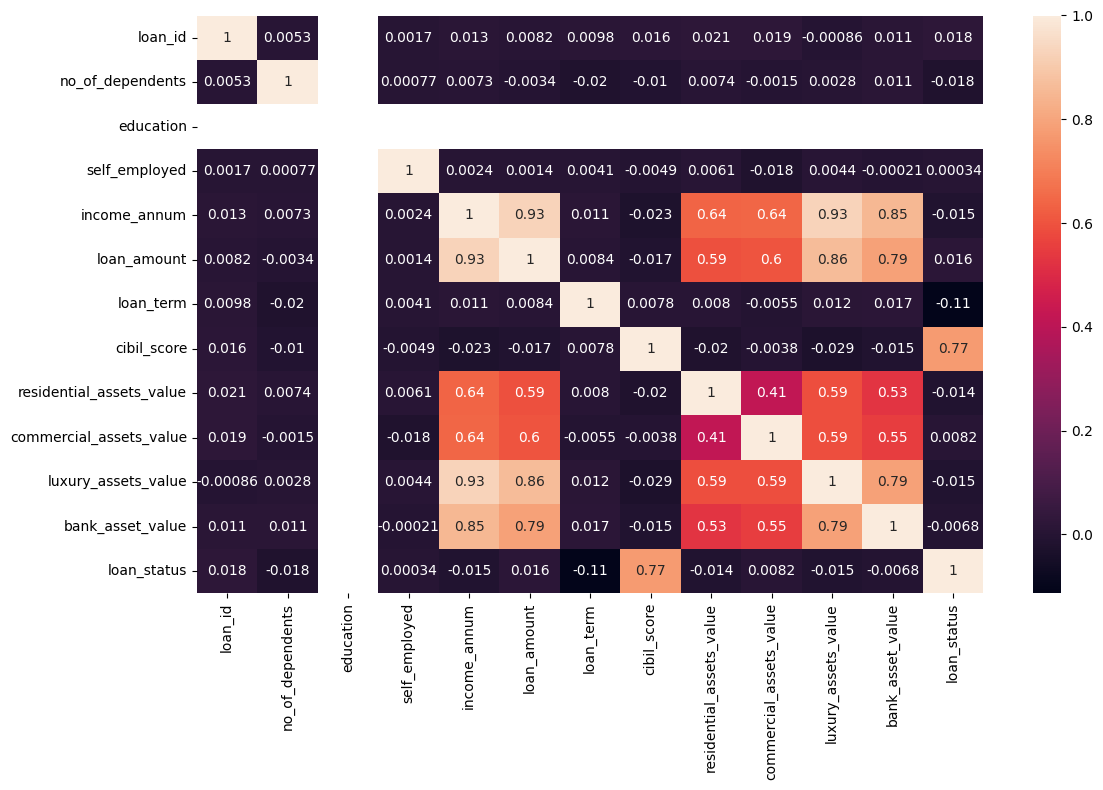

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_data.corr(), annot=True)
plt.tight_layout()

## Feature Engineering

You may want to convert categorical variables to numerical. For example, education takes on the value Graduate and Not Graduate. But we want it to be 0 or 1 for machine learning algorithms to use.

In [7]:
#done above

## Model Selection

You are free to use any classification machine learning models you like: Logistic Regression, Decision Trees/Random Forests, Support Vector Machines, KNN ... 

In [23]:
# TODO
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y = loan_data["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(loan_data, y, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

(3415, 13) (854, 13)
(3415,) (854,)


RandomForestClassifier()

## Model Training and Evaluation

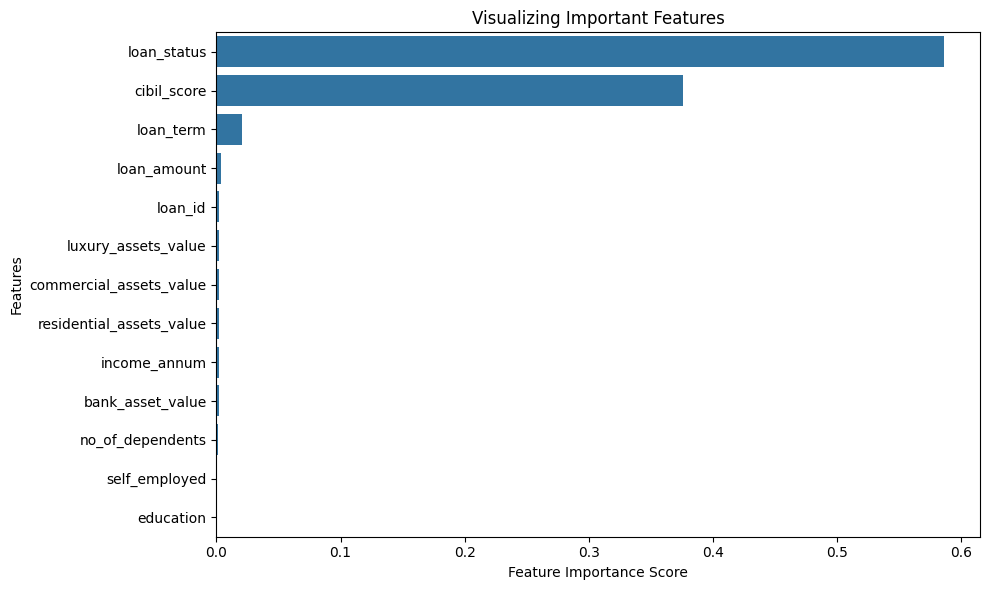

In [25]:
#feature importance

feature_imp = pd.Series(clf.feature_importances_, index=loan_data.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

In [32]:
#training model
#remove less important features
X = loan_data.drop(columns = ['loan_status','loan_amount','loan_id', 'luxury_assets_value', 'commercial_assets_value', 'residential_assets_value',
                               'income_annum','bank_asset_value','no_of_dependents','self_employed','education'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(n_estimators=100, random_state = 42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

prediction = clf.predict(X)

new_loan_data['Survival_Predictions'] = pd.Series(prediction)
new_loan_data

,loan_term,cibil_score,loan_status,Survival_Predictions
0,12,778,1,1
1,8,417,0,0
2,20,506,0,0
3,8,467,0,0
4,20,382,0,0
...,...,...,...,...
4264,12,317,0,0
4265,20,559,1,1
4266,18,457,0,0
4267,8,780,1,1


## Model Optimization and Testing

   Accuracy: 0.9473067915690867
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       322
           1       0.96      0.95      0.96       532

    accuracy                           0.95       854
   macro avg       0.94      0.94      0.94       854
weighted avg       0.95      0.95      0.95       854



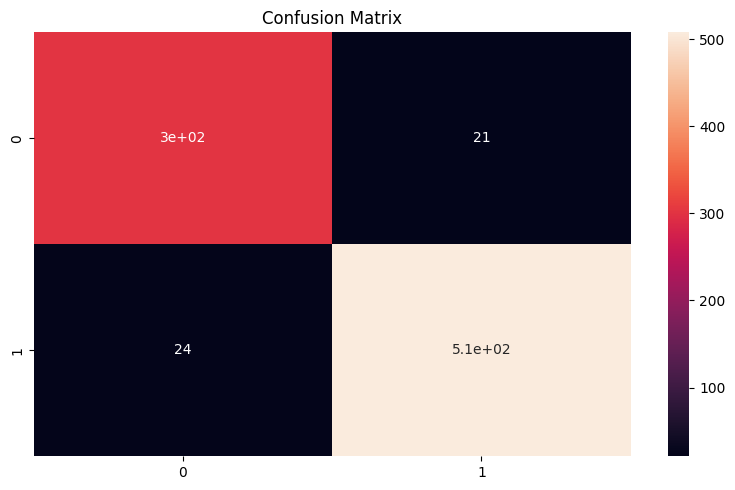

In [33]:
print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)

# Perform the search
random_search.fit(X_train, y_train)

# Best parameters and best score
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 156}
Best Score: 0.958125915080527


In [40]:
# Use the best model from random search
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))

   Accuracy: 0.949648711943794
